# Problem statement

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

# Read the data

In [30]:
df = pd.read_csv("Online Retail.csv")

In [31]:
df.head(24)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [32]:
df.shape

(541909, 8)

# Missing Values Treatment

In [4]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df['Description'].fillna(df['Description'].mode()[0],inplace=True)

In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Exploratory Data analysis

In [7]:
# seperate categorical and continious columns

In [8]:
cat = []
con = []

for i in df.columns:
    if(df[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [9]:
df_cat = cat
df_cat=df[cat]
df_cat

,InvoiceNo,StockCode,Description,InvoiceDate,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,01-12-2010 08:26,United Kingdom
1,536365,71053,WHITE METAL LANTERN,01-12-2010 08:26,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,01-12-2010 08:26,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,01-12-2010 08:26,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,01-12-2010 08:26,United Kingdom
...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,09-12-2011 12:50,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,09-12-2011 12:50,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,09-12-2011 12:50,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,09-12-2011 12:50,France


In [10]:
df_con = con
df_con=df[con]
df_con

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0
...,...,...,...
541904,12,0.85,12680.0
541905,6,2.10,12680.0
541906,4,4.15,12680.0
541907,4,4.15,12680.0


In [11]:
# removing outliers

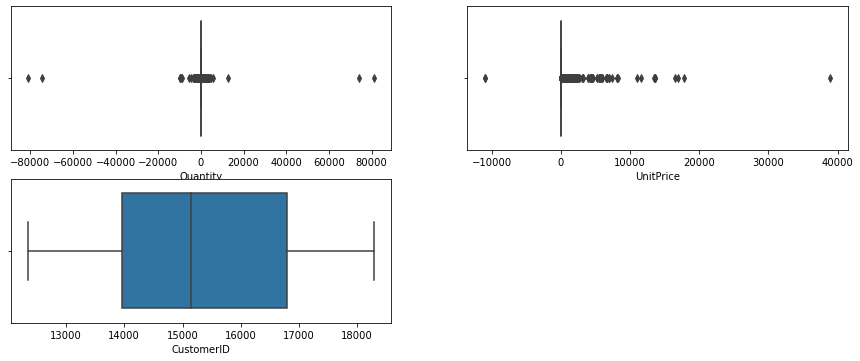

In [12]:
plt.figure(figsize=(15,9))
for x1,i in enumerate(df_con.columns):
    if df_con[i].dtypes=='int64' or df_con[i].dtypes=='float64':
        plt.subplot(3,2,x1+1)
        sns.boxplot(df_con[i])

In [13]:
for i in df_con.columns:
    q1 = df_con[i].quantile(0.25)
    q3 = df_con[i].quantile(0.75)
    IQR = q3-q1
    uppertail = q3+1.5*IQR
    lowertail = q1-1.5*IQR
    df_con.loc[(df_con[i]>uppertail)|(df_con[i]<lowertail)]
    mean_1= df_con[i].mean()
    df_con.loc[(df_con[i]>uppertail)| (df_con[i]<lowertail),i]=mean_1

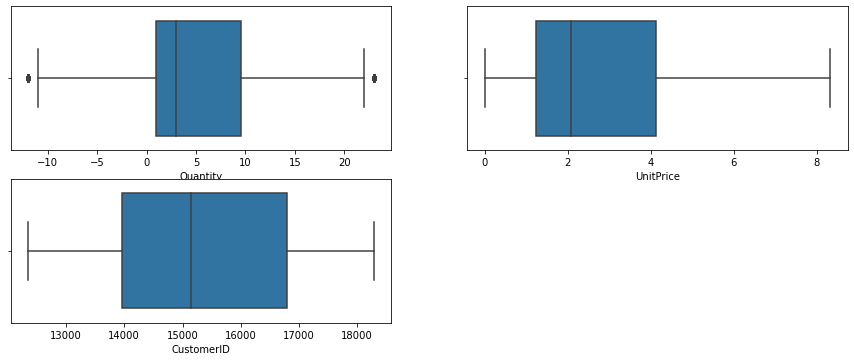

In [14]:
plt.figure(figsize=(15,9))
for x1,i in enumerate(df_con.columns):
    if df_con[i].dtypes=='int64' or df_con[i].dtypes=='float64':
        plt.subplot(3,2,x1+1)
        sns.boxplot(df_con[i])

In [15]:
df.shape

(541909, 8)

In [16]:
df.shape

(541909, 8)

In [17]:
# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [18]:
# Calculate total purchase amount
df["TotalAmount"] = df["Quantity"] * df["UnitPrice"]


In [19]:
df["TotalAmount"]

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalAmount, Length: 541909, dtype: float64

In [20]:
# Calculate the recency of purchases for each customer

In [21]:
# Calculate the frequency of purchases for each customer
frequency_df = df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
frequency_df.columns = ["CustomerID", "Frequency"]

In [22]:
# Calculate the recency of purchases for each customer
max_date = df["InvoiceDate"].max()
recency_df = df.groupby("CustomerID")["InvoiceDate"].max().reset_index()
recency_df["Recency"] = (max_date - recency_df["InvoiceDate"]).dt.days
recency_df.drop("InvoiceDate", axis=1, inplace=True)

In [23]:
# Calculate the average purchase amount for each customer
average_purchase_df = df.groupby("CustomerID")["TotalAmount"].mean().reset_index()
average_purchase_df.columns = ["CustomerID", "AveragePurchaseAmount"]

In [24]:
# Merge the features into a single dataframe
customer_features = frequency_df.merge(recency_df, on="CustomerID").merge(average_purchase_df, on="CustomerID")

# Label Clustering

In [25]:
# Step 3: Customer Segmentation
# Select relevant features for segmentation
selected_features = ["Frequency", "Recency", "AveragePurchaseAmount"]
X = customer_features[selected_features]


In [26]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# Apply PCA
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering using the linkage function
# dend = shc.dendrogram(shc.linkage(X_pca,method = 'ward'))
Z = linkage(X_pca, method='ward')
# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

KeyboardInterrupt: 

In [ ]:
# Creating a NumPy array with multiple elements
my_array = np.array(Z)

# Convert the NumPy array to a Python list of integers
result_list = my_array.tolist()
# or
result_list = list(my_array)

print(result_list)

In [ ]:
# Convert the list to a DataFrame
df1 = pd.DataFrame(result_list)

print(df)


In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(X_pca)

In [ ]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_features["Cluster"] = kmeans.fit_predict(X_pca)


In [ ]:
# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customer_features["Cluster"], cmap="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation using PCA")
plt.show()

In [ ]:
customer_features.head(1000)

In [ ]:
rename_mapping = {'Cluster': {1: 'Medium-Value Customers',2:'Low-Value Customers', 3:'Inactive Customers',0:"High Value Customer"}}

In [ ]:
customer_features.replace(rename_mapping, inplace=True)


In [ ]:
customer_features

In [ ]:
customer_features.to_csv("segmented_customer_data.csv", index=False)

In [ ]:
customer_features